In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [50]:
df = pd.read_csv('train.csv')
df.head()

key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [51]:
df1 = df.drop('key',axis=1)
df1.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5  2009-06-15 17:26:21 UTC        -73.844311        40.721319   
1         16.9  2010-01-05 16:52:16 UTC        -74.016048        40.711303   
2          5.7  2011-08-18 00:35:00 UTC        -73.982738        40.761270   
3          7.7  2012-04-21 04:30:42 UTC        -73.987130        40.733143   
4          5.3  2010-03-09 07:51:00 UTC        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.841610         40.712278                1  
1         -73.979268         40.782004                1  
2         -73.991242         40.750562                2  
3         -73.991567         40.758092                1  
4         -73.956655         40.783762                1

In [52]:
df1.shape

(50000, 7)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        50000 non-null  float64
 1   pickup_datetime    50000 non-null  object 
 2   pickup_longitude   50000 non-null  float64
 3   pickup_latitude    50000 non-null  float64
 4   dropoff_longitude  50000 non-null  float64
 5   dropoff_latitude   50000 non-null  float64
 6   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


pickup datetime is object but should be datetime so need to be converted

we're predicting fare

In [54]:
df1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [55]:
df1.pickup_datetime = pd.to_datetime(df1.pickup_datetime)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        50000 non-null  float64            
 1   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   50000 non-null  float64            
 3   pickup_latitude    50000 non-null  float64            
 4   dropoff_longitude  50000 non-null  float64            
 5   dropoff_latitude   50000 non-null  float64            
 6   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [56]:
df1.pickup_datetime.head(3)

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        50000 non-null  float64            
 1   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   50000 non-null  float64            
 3   pickup_latitude    50000 non-null  float64            
 4   dropoff_longitude  50000 non-null  float64            
 5   dropoff_latitude   50000 non-null  float64            
 6   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [58]:
df1 = df1.assign(
    hour = df1.pickup_datetime.dt.hour,
    minute = df1.pickup_datetime.dt.minute,
    month = df1.pickup_datetime.dt.month,
    year = df1.pickup_datetime.dt.year,
    day = df1.pickup_datetime.dt.day,
    dayofweek = df1.pickup_datetime.dt.dayofweek,
)

In [59]:
df1.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16+00:00        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00+00:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42+00:00        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00+00:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  minute  month  \
0         -73.841610         40.712278                1    17      26      6   
1         -73.979268         40.782004                1    16      52      1   
2         -73.991242         40.750562                2     0      35      8   
3         -73.991567         40.758092                1     4      30      4   
4         -73.956655         40.783762                1     7      51      3   

   year  day  dayofweek  
0  2009   15          0  
1  2010    5          1  
2  2011   18          3  
3  2012   21          5  
4  2010    9          1

In [60]:
df1.shape

(50000, 13)

In [61]:
df1.drop('pickup_datetime',axis=1,inplace=True)
df1.shape

(50000, 12)

In [62]:
df1.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  hour  minute  month  year  day  \
0         40.712278                1    17      26      6  2009   15   
1         40.782004                1    16      52      1  2010    5   
2         40.750562                2     0      35      8  2011   18   
3         40.758092                1     4      30      4  2012   21   
4         40.783762                1     7      51      3  2010    9   

   dayofweek  
0          0  
1          1  
2          3  
3          5  
4          1

To improve accuracy we can calculate distance travelled from longitude and latitude

In [63]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    travel = []

    for i in range(len(lat1)):
        
        long1 = radians(lon1[i])
        long2 = radians(lon2[i])
        lati1 = radians(lat1[i])
        lati2 = radians(lat2[i])
      
        # Haversine formula
        dlon = long2 - long1
        dlat = lati2 - lati1
        a = sin(dlat / 2)**2 + cos(lati1) * cos(lati2) * sin(dlon / 2)**2
    
        c = 2 * asin(sqrt(a))
        
        # Radius of earth in kilometers. Use 3956 for miles!
        r = 6371
        dist = c*r
        travel.append(dist)
      
    # calculate the result
    return travel

In [64]:
df1['dist_travel_km'] = distance(df1.pickup_latitude.to_numpy(), df1.dropoff_latitude.to_numpy(), df1.pickup_longitude.to_numpy(), df1.dropoff_longitude.to_numpy())

In [65]:
df1.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  hour  minute  month  year  day  \
0         40.712278                1    17      26      6  2009   15   
1         40.782004                1    16      52      1  2010    5   
2         40.750562                2     0      35      8  2011   18   
3         40.758092                1     4      30      4  2012   21   
4         40.783762                1     7      51      3  2010    9   

   dayofweek  dist_travel_km  
0          0        1.030764  
1          1        8.450134  
2          3        1.389525  
3          5        2.799270  
4          1        1.999157

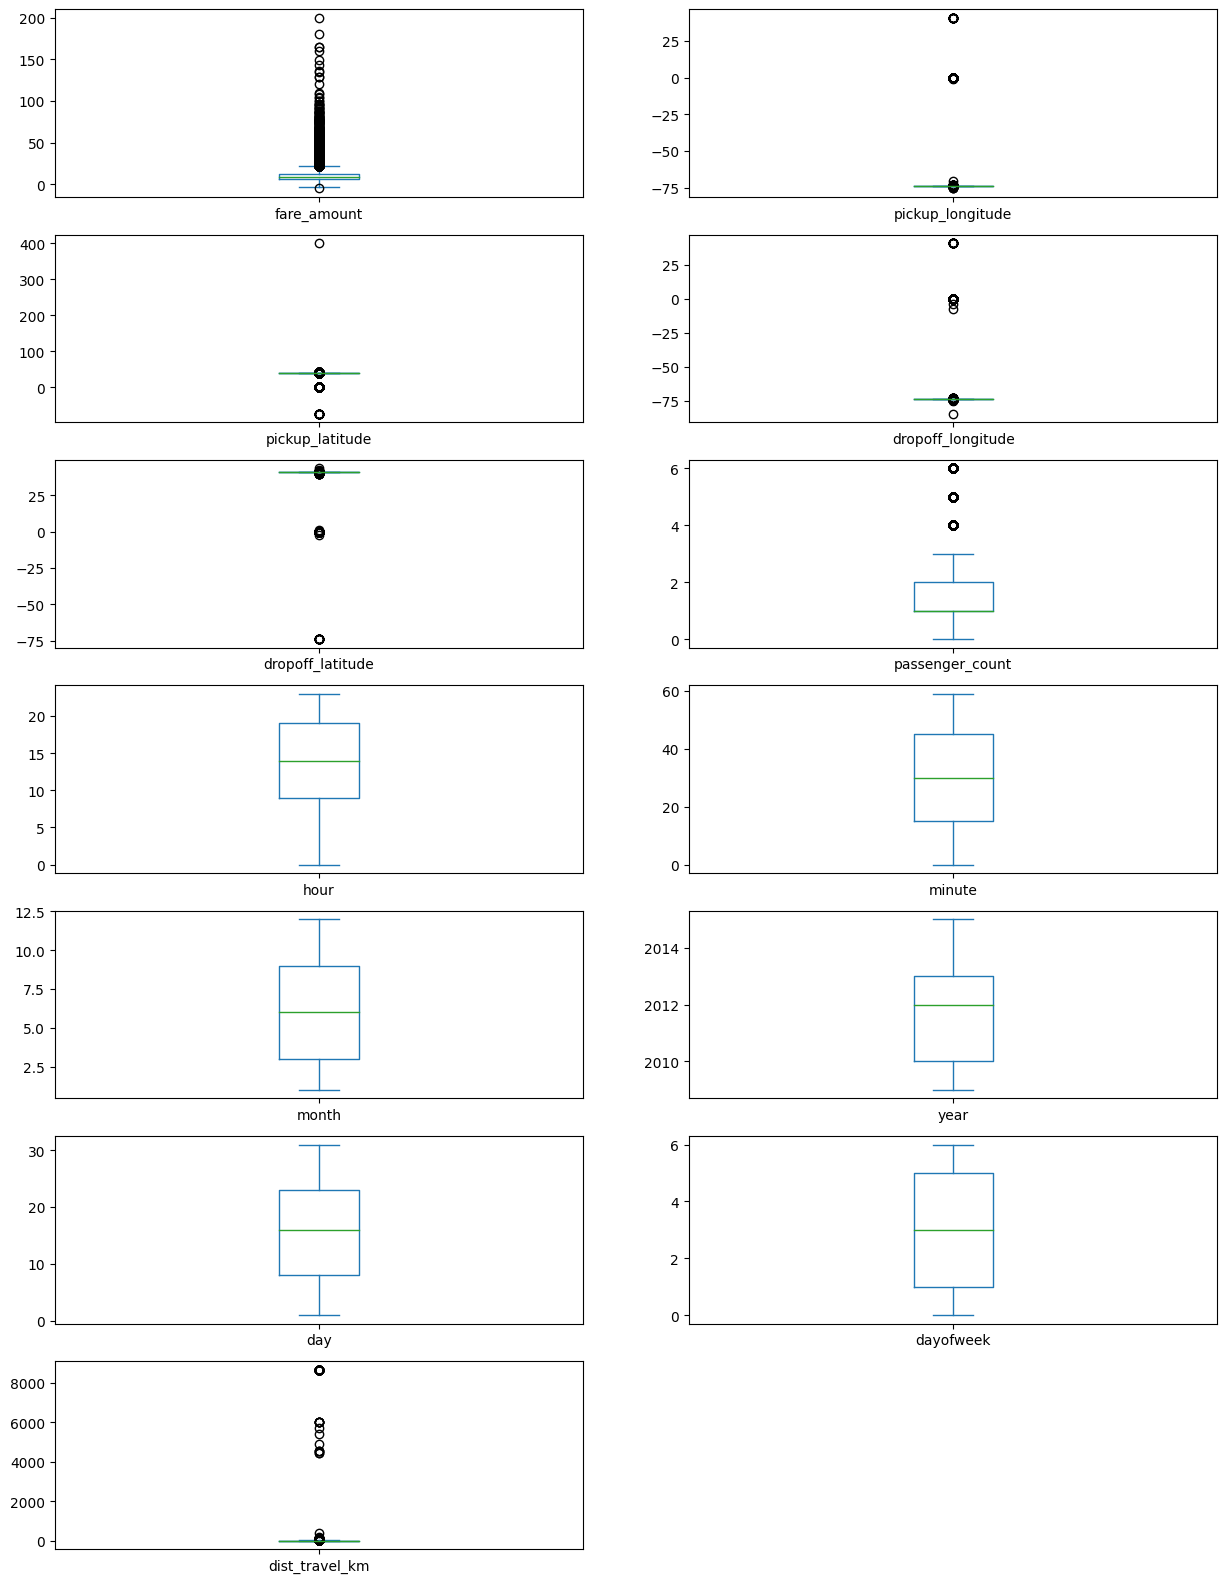

In [66]:
df1.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

We need to see whether we actually need to remove outliers or not!

New function for handling outliers!

In [67]:
df1.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  50000.000000      50000.000000     50000.000000       50000.000000   
mean      11.364171        -72.509756        39.933759         -72.504616   
std        9.685557         10.393860         6.224857          10.407570   
min       -5.000000        -75.423848       -74.006893         -84.654241   
25%        6.000000        -73.992062        40.734880         -73.991152   
50%        8.500000        -73.981840        40.752678         -73.980082   
75%       12.500000        -73.967148        40.767360         -73.963584   
max      200.000000         40.783472       401.083332          40.851027   

       dropoff_latitude  passenger_count          hour        minute  \
count      50000.000000     50000.000000  50000.000000  50000.000000   
mean          39.926251         1.667840     13.489080     29.665420   
std            6.014737         1.289195      6.506935     17.306535   
min          -74.006377         0.000000      0.000000      0.000000   
25%           40.734372         1.000000      9.000000     15.000000   
50%           40.753372         1.000000     14.000000     30.000000   
75%           40.768167         2.000000     19.000000     45.000000   
max           43.415190         6.000000     23.000000     59.000000   

              month          year           day     dayofweek  dist_travel_km  
count  50000.000000  50000.000000  50000.000000  50000.000000    50000.000000  
mean       6.273300   2011.739260     15.672040      3.029980       18.508946  
std        3.461157      1.862639      8.660789      1.956936      355.564309  
min        1.000000   2009.000000      1.000000      0.000000        0.000000  
25%        3.000000   2010.000000      8.000000      1.000000        1.223146  
50%        6.000000   2012.000000     16.000000      3.000000        2.120114  
75%        9.000000   2013.000000     23.000000      5.000000        3.895570  
max       12.000000   2015.000000     31.000000      6.000000     8667.818812

In [76]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [77]:
df1.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.929777        40.721319         -73.922231   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  hour  minute  month  year  day  \
0         40.712278              1.0    17      26      6  2009   15   
1         40.782004              1.0    16      52      1  2010    5   
2         40.750562              2.0     0      35      8  2011   18   
3         40.758092              1.0     4      30      4  2012   21   
4         40.783762              1.0     7      51      3  2010    9   

   dayofweek  dist_travel_km  
0          0        1.030764  
1          1        8.450134  
2          3        1.389525  
3          5        2.799270  
4          1        1.999157

In [78]:
df1 = treat_outliers_all(df1 , df1.columns.to_list())

In [80]:
df1.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  50000.000000      50000.000000     50000.000000       50000.000000   
mean      10.107126        -73.978297        40.750266         -73.976010   
std        5.464402          0.020518         0.025704           0.022836   
min       -3.750000        -74.029433        40.686159         -74.032504   
25%        6.000000        -73.992062        40.734880         -73.991152   
50%        8.500000        -73.981840        40.752678         -73.980082   
75%       12.500000        -73.967148        40.767360         -73.963584   
max       22.250000        -73.929777        40.816081         -73.922231   

       dropoff_latitude  passenger_count          hour        minute  \
count      50000.000000     50000.000000  50000.000000  50000.000000   
mean          40.750478         1.504640     13.489080     29.665420   
std            0.028531         0.867908      6.506935     17.306535   
min           40.683678         0.000000      0.000000      0.000000   
25%           40.734372         1.000000      9.000000     15.000000   
50%           40.753372         1.000000     14.000000     30.000000   
75%           40.768167         2.000000     19.000000     45.000000   
max           40.818860         3.500000     23.000000     59.000000   

              month          year           day     dayofweek  dist_travel_km  
count  50000.000000  50000.000000  50000.000000  50000.000000    50000.000000  
mean       6.273300   2011.739260     15.672040      3.029980        2.867761  
std        3.461157      1.862639      8.660789      1.956936        2.238482  
min        1.000000   2009.000000      1.000000      0.000000        0.000000  
25%        3.000000   2010.000000      8.000000      1.000000        1.223146  
50%        6.000000   2012.000000     16.000000      3.000000        2.120114  
75%        9.000000   2013.000000     23.000000      5.000000        3.895570  
max       12.000000   2015.000000     31.000000      6.000000        7.904207

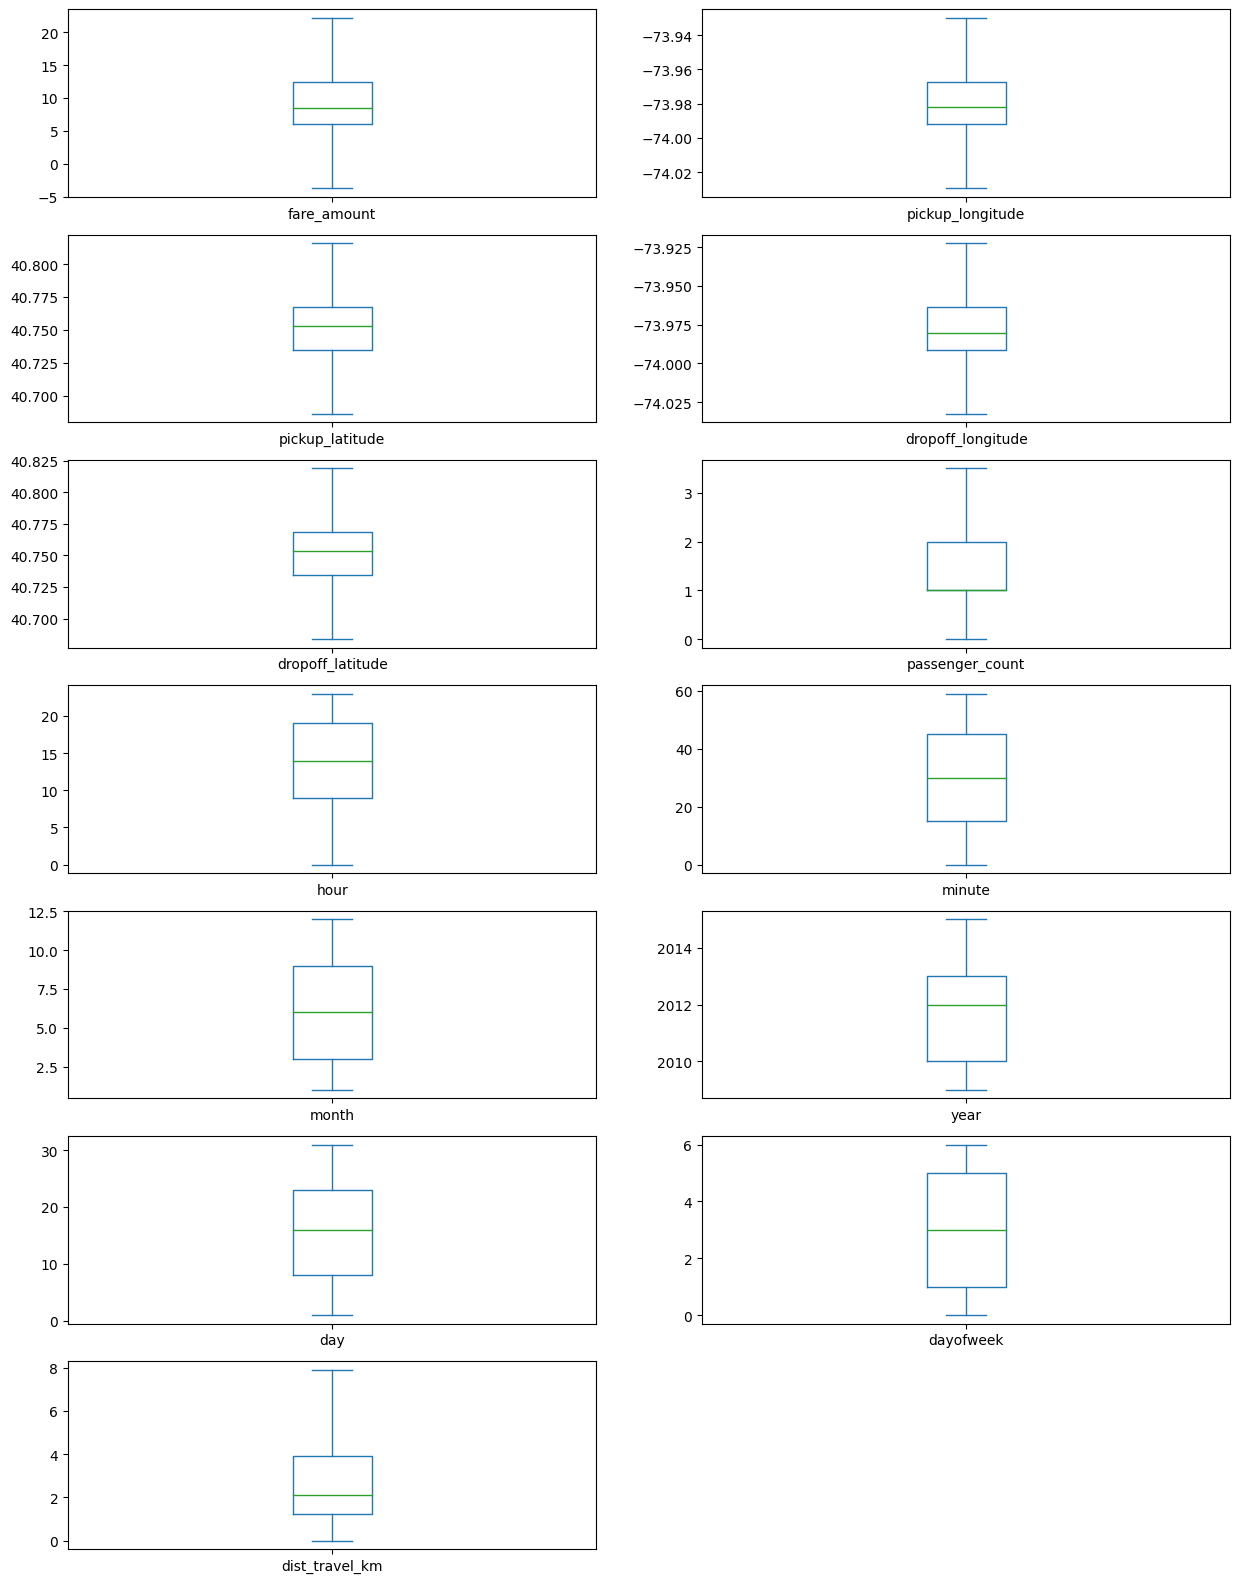

In [81]:
df1.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [83]:
df1.shape

(50000, 13)

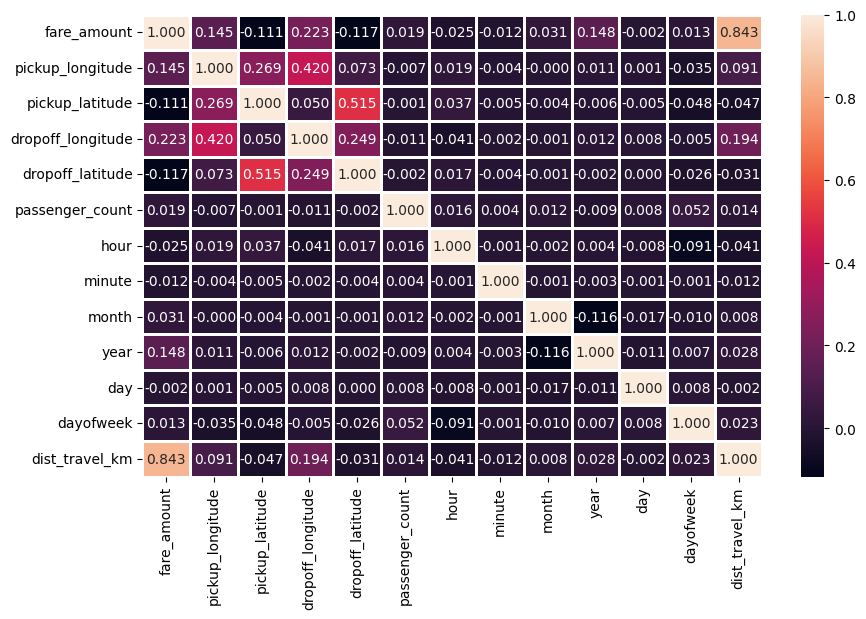

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,fmt='.3f',linewidths=2)
plt.show()

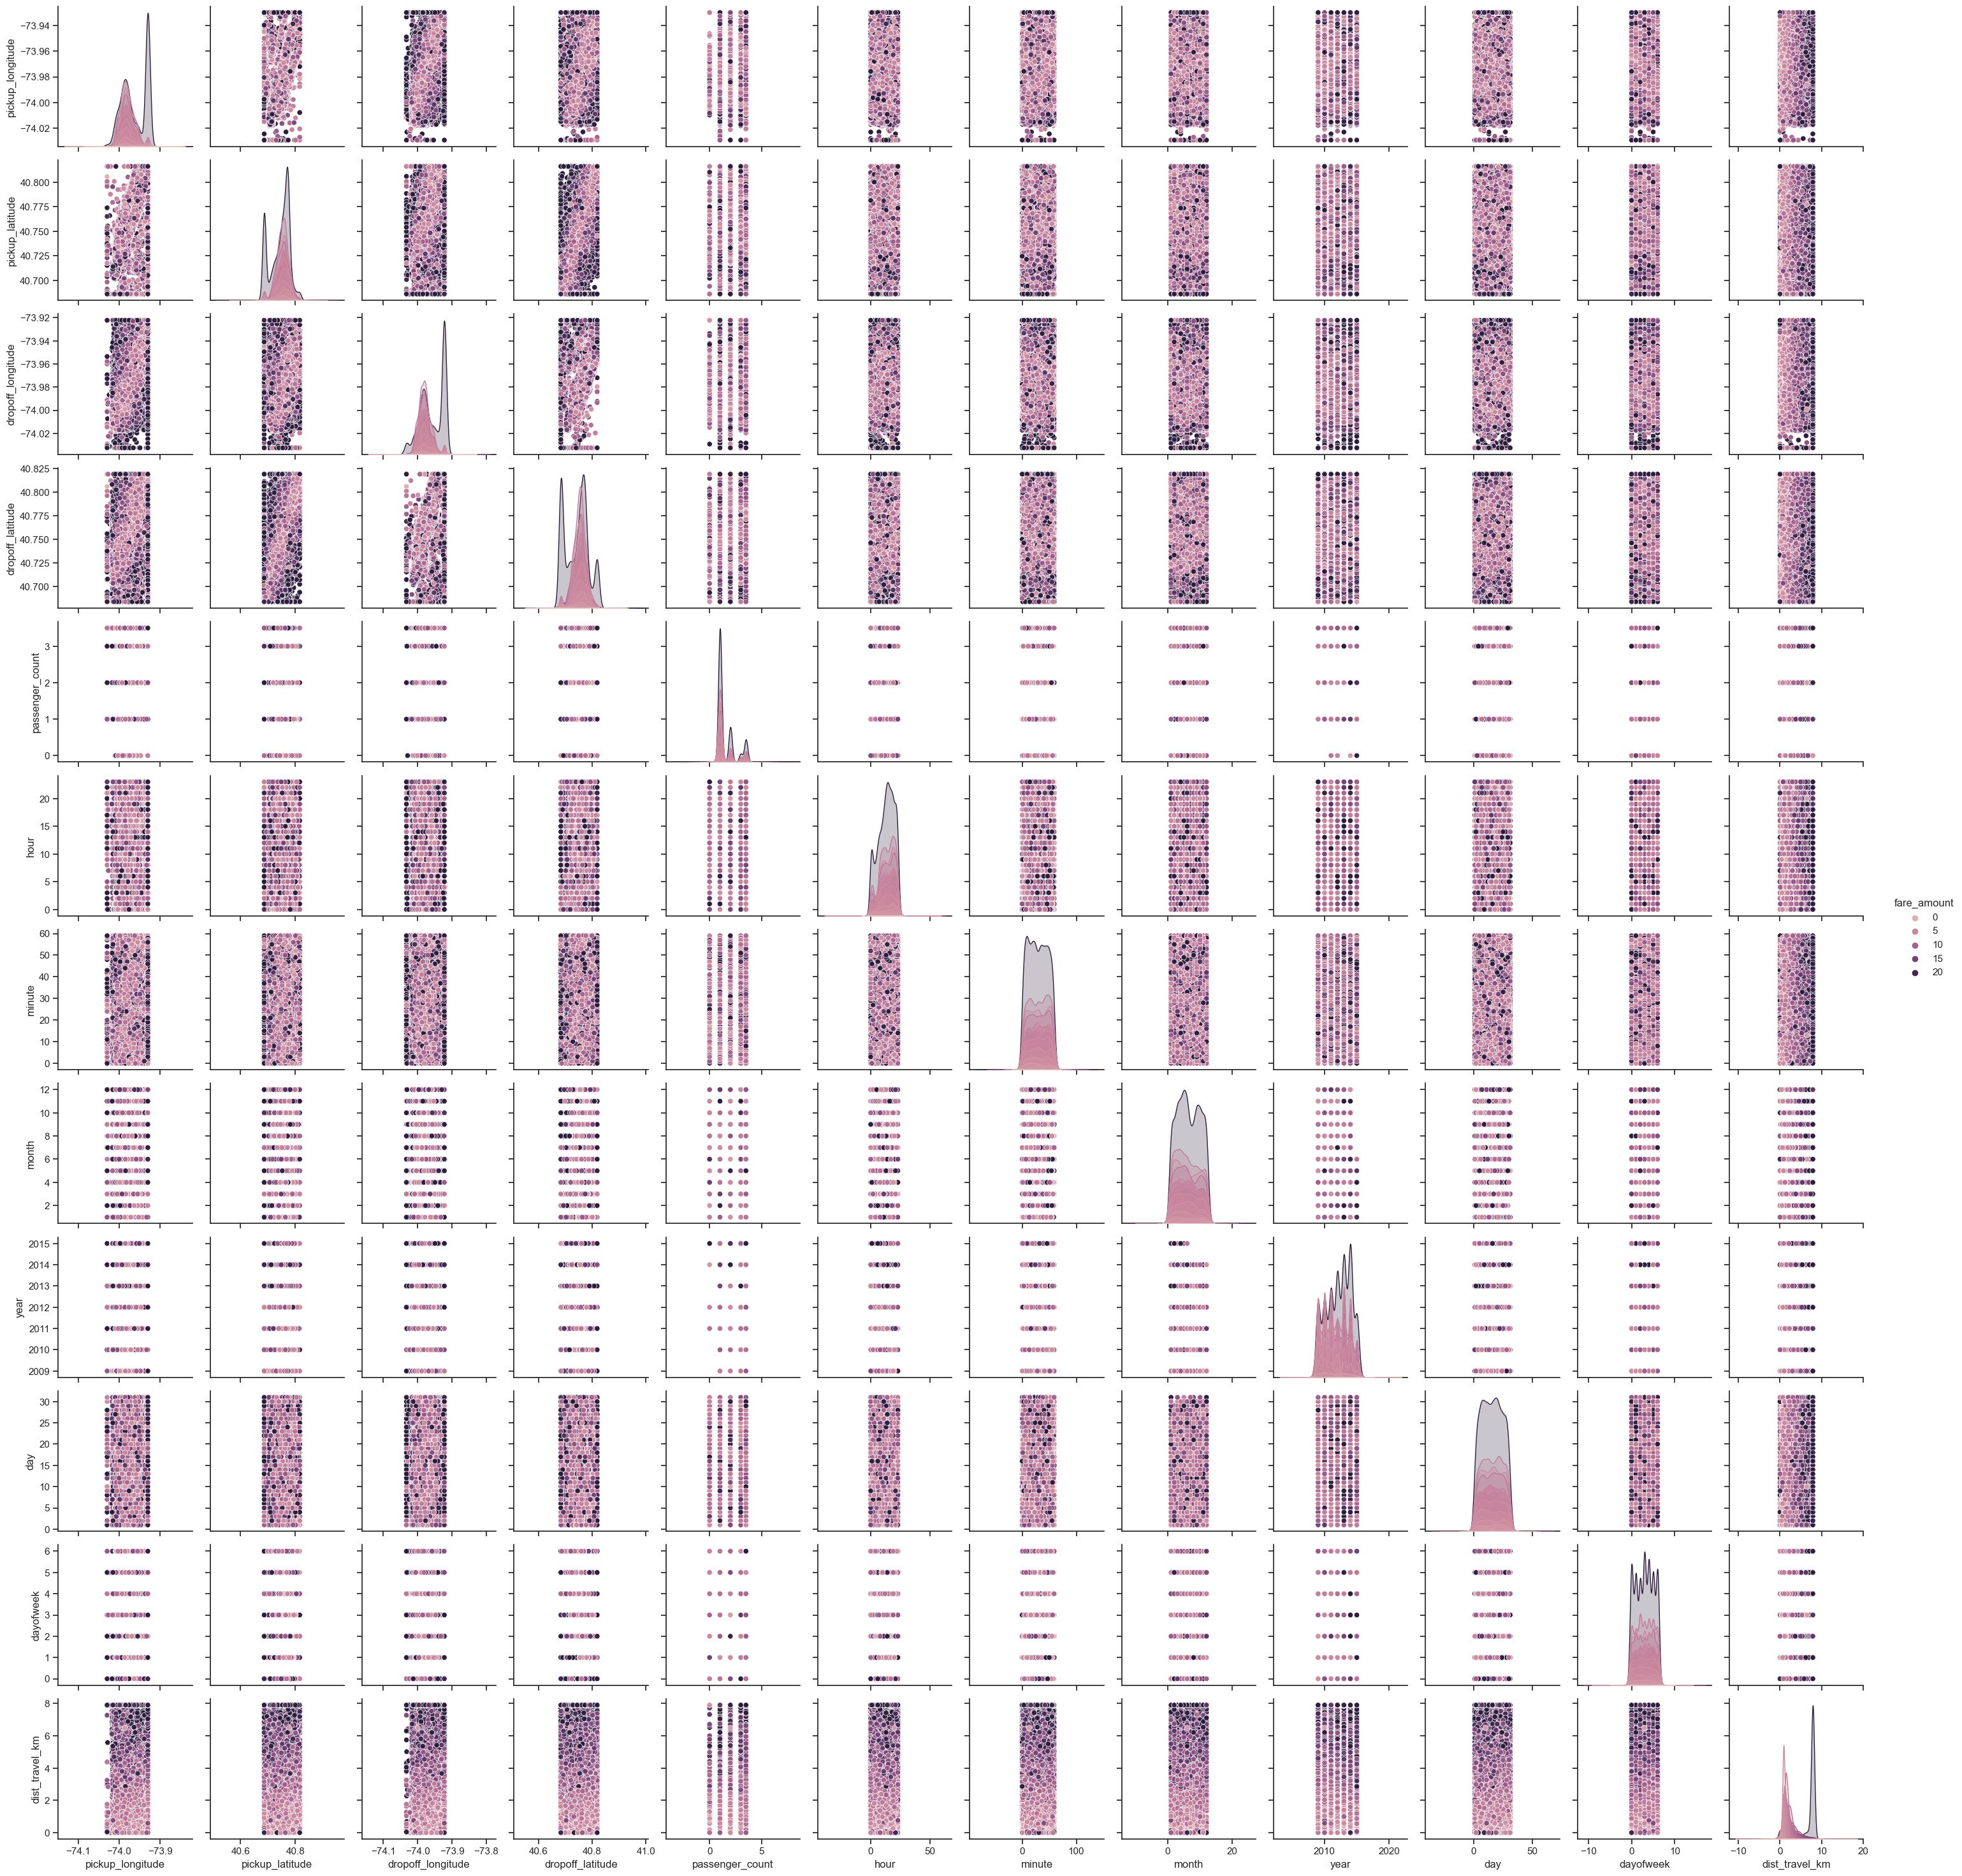

In [92]:
sns.set_theme(style="ticks")
sns.pairplot(df1, hue="fare_amount")

array([[<AxesSubplot: title={'center': 'fare_amount'}>,
        <AxesSubplot: title={'center': 'pickup_longitude'}>,
        <AxesSubplot: title={'center': 'pickup_latitude'}>,
        <AxesSubplot: title={'center': 'dropoff_longitude'}>],
       [<AxesSubplot: title={'center': 'dropoff_latitude'}>,
        <AxesSubplot: title={'center': 'passenger_count'}>,
        <AxesSubplot: title={'center': 'hour'}>,
        <AxesSubplot: title={'center': 'minute'}>],
       [<AxesSubplot: title={'center': 'month'}>,
        <AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'day'}>,
        <AxesSubplot: title={'center': 'dayofweek'}>],
       [<AxesSubplot: title={'center': 'dist_travel_km'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

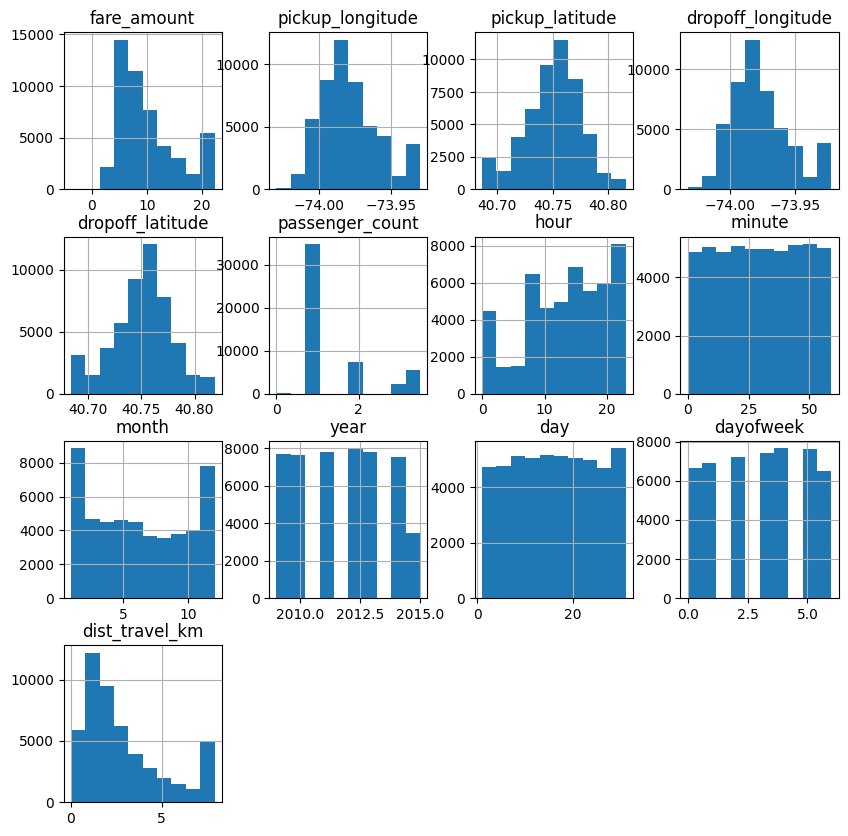

In [91]:
df1.hist(figsize=(10,10))

Train Test Split!

In [90]:
X = df1.drop('fare_amount',axis=1)
y = df1.fare_amount

X.shape, y.shape

((50000, 12), (50000,))

In [96]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 12), (10000, 12), (40000,), (10000,))

In [98]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [100]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [101]:
y_pred_lin = reg.predict(X_test)
print(y_pred_lin)

[10.18367549 20.28977806  6.1159838  ...  9.52816812 20.51781331
  6.51853217]


In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test,y_pred_lin)
rmse = sqrt(mean_squared_error(y_test,y_pred_lin))

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}".format(round(mae,3),round(rmse,3)))

Mean Absolute Error: 1.834
Root Mean Square Error: 2.777


Random Forest

We need to scale for RF

In [108]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [109]:
X_train_RF.shape, X_test_RF.shape

((40000, 12), (10000, 12))

In [110]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [112]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [113]:
y_pred_RF = rf.predict(X_test_RF)
print(y_pred_RF)

[ 9.54  22.075  5.15  ...  7.79  18.765  6.69 ]


In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test,y_pred_RF)
rmse = sqrt(mean_squared_error(y_test,y_pred_RF))

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}".format(round(mae,3),round(rmse,3)))

Mean Absolute Error: 1.698
Root Mean Square Error: 2.628


Lesser than LR. But we can improve this by using Gridsearch CV

In [116]:
from sklearn.model_selection import ParameterGrid
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
pg = ParameterGrid(parameters)
len(pg)

189

In [118]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}

rf_cv = RandomForestRegressor(random_state=42)

clf = GridSearchCV(rf_cv, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}


In [122]:
y_pred_RF_cv = clf.predict(X_test_RF)
print(y_pred_RF_cv)

[ 8.98817995 20.38304682  5.01003336 ...  8.11375695 21.08004533
  6.90051513]


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test,y_pred_RF_cv)
rmse = sqrt(mean_squared_error(y_test,y_pred_RF_cv))

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}".format(round(mae,3),round(rmse,3)))

Mean Absolute Error: 1.566
Root Mean Square Error: 2.448


In [127]:
import pickle
pickle.dump(clf, open('rf-cv.pkl', 'wb'))

In [ ]:
# rf_model = pickle.load(open('rf-cv.pkl', 'rb'))
# rf_model.predict(X_test)